<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg" width="300">

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although where was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

For this project, I worked with the [Titanic dataset](https://www.kaggle.com/c/titanic) on Kaggle.com. In this project, I get to apply machine learning tools to analyze the passenger information from the training set, and analyzed what factors may affect a passenger's chance for survival.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stage I: Data Exploration


### (2) Load the training dataset as a Pandas DataFrame.

In [ ]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### (3) Obtain basic information of variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

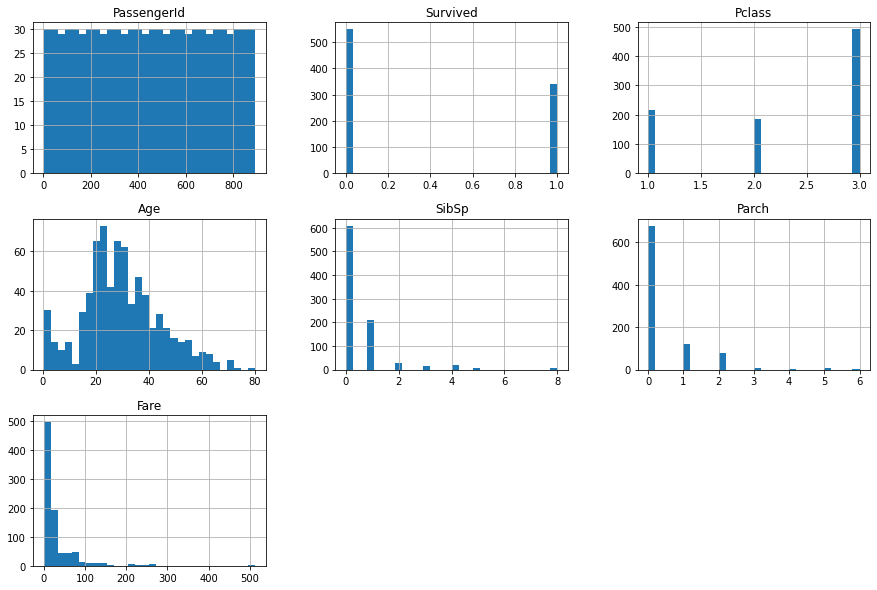

In [ ]:
df.hist(bins=30, figsize=(15, 10))

### (4). Data Cleaning

In [ ]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
null_rate = len(df) * 0.95
df = df.dropna(thresh=null_rate, axis=1)

In [ ]:
df = df.dropna()
df.drop(columns=['PassengerId', 'Ticket'], inplace=True)

In [ ]:
df

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,0,0,30.0000,C


### (5) Correlation coefficients and scatter plots

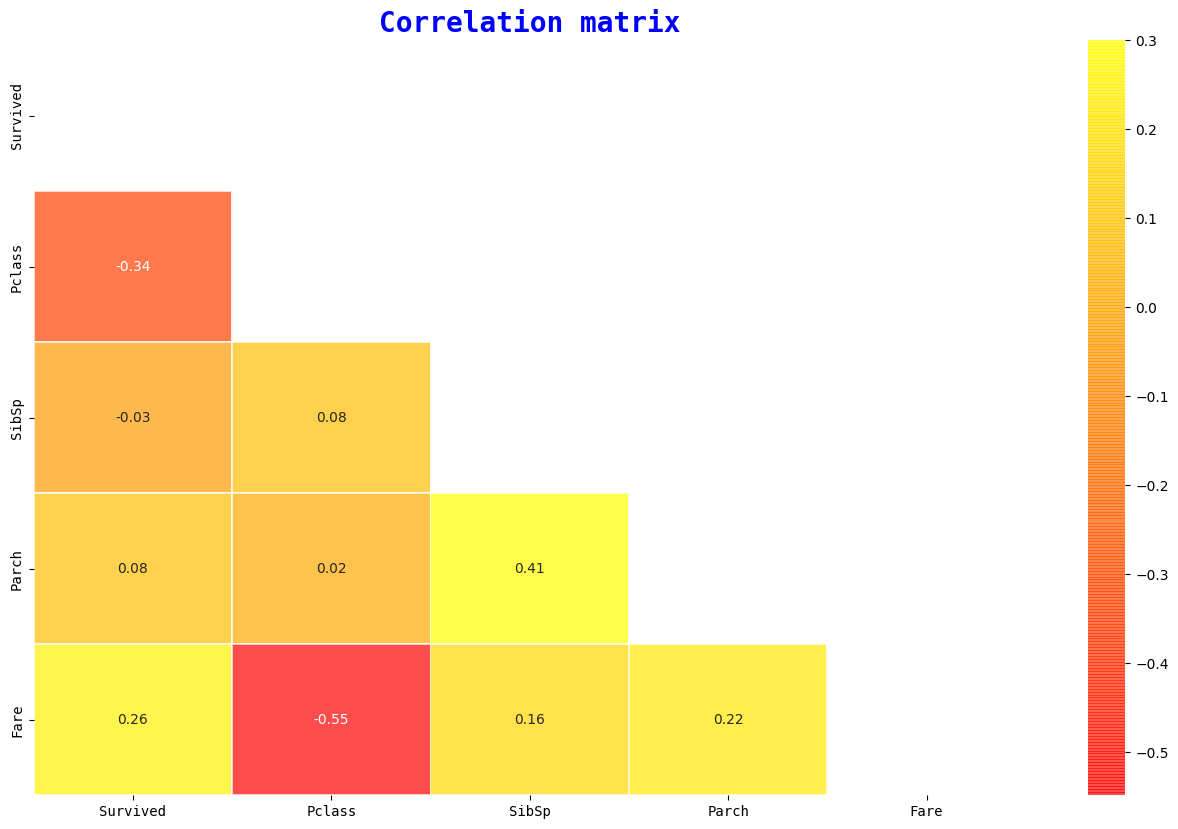

In [ ]:
# Correlation matrix

df1 = df.copy()

cols = df1.columns

plt.figure(figsize = (16, 10), dpi = 100)

corr = df1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr,
            mask = mask,
            cmap = 'autumn',
            vmax=.3,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            alpha = 0.7)

hfont = {'fontname':'monospace'}
plt.xticks(**hfont)
plt.yticks(**hfont)

plt.title('Correlation matrix',
          family = 'monospace',
          fontsize = 20,
          weight = 'semibold',
          color = 'blue')

plt.show()

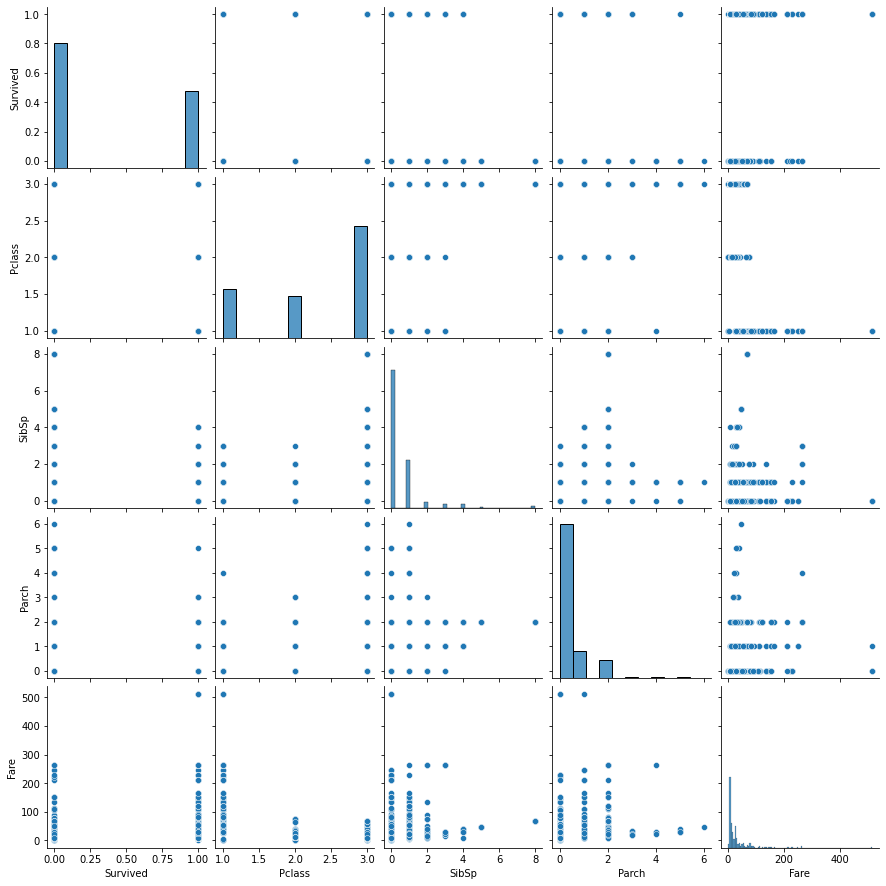

In [ ]:
sns.pairplot(df)

### (6) (optional) create a column to indicate whether a passenger has a rare title.

In [ ]:
rare_title = ["Dr.", "Mme", "Master."]
df["rare_title"] = df['Name'].apply(lambda x: 1 if any(i in x for i in rare_title) else 0)

# Stage II: Model Construction


### (1) Converting Categorical Features


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
dummies = pd.get_dummies(df['Embarked']).rename(columns=lambda x: 'Embarked_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['Embarked', 'Name'], axis=1)

In [ ]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,rare_title,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,7.2500,0,0,0,1
1,1,1,0,1,0,71.2833,0,1,0,0
2,1,3,0,0,0,7.9250,0,0,0,1
3,1,1,0,1,0,53.1000,0,0,0,1
4,0,3,1,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,0,0,0,1
887,1,1,0,0,0,30.0000,0,0,0,1
888,0,3,0,1,2,23.4500,0,0,0,1
889,1,1,1,0,0,30.0000,0,1,0,0


### (4) (Optional: Feature Engineering) create an indicator variable on whether a person paid for the ticket.

In [ ]:
df["is_paid"] = df['Fare'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
y = df['Survived']
X = df.drop(columns=['Survived'])

### (2) Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

### (3) Extract Validation set

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### (5) Building Models


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logr = LogisticRegression()
svm = LinearSVC(max_iter=5000)

# Stage III: Model Selection and Interpretation

In [ ]:
from sklearn.model_selection import cross_val_score

scores_logr = cross_val_score(logr, X, y, cv=5, scoring='f1_macro')
scores_svm = cross_val_score(svm, X, y, cv=5, scoring='f1_macro')

In [ ]:
max(scores_logr)

0.848526341012563

In [ ]:
max(scores_svm)

0.8494539516211344

In [ ]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
svm = LinearSVC(max_iter=5000)
svm.fit(X_train, y_train)

LinearSVC(max_iter=5000)

In [ ]:
from sklearn.metrics import confusion_matrix

logr_pred = logr.predict(X_test)
cm_logr = confusion_matrix(y_test, logr_pred)

svm_pred = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, svm_pred)

In [ ]:
target_names=['0', '1']

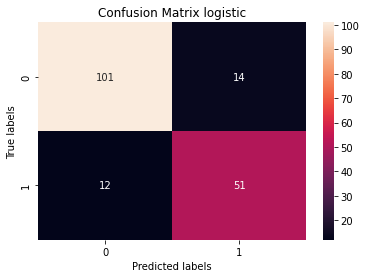

In [ ]:
ax = plt.subplot()
sns.heatmap(cm_logr, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix logistic'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

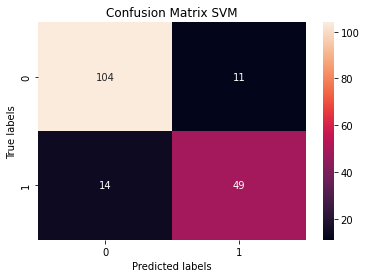

In [ ]:
ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SVM'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision of logistic model is: ", precision_score(y_test, logr_pred))
print("Precision of svm model is: ", precision_score(y_test, svm_pred))

print("Recall of logistic model is: ", recall_score(y_test, logr_pred))
print("Recall of svm model is: ", recall_score(y_test, svm_pred))


Precision of logistic model is:  0.7846153846153846
Precision of svm model is:  0.8166666666666667
Recall of logistic model is:  0.8095238095238095
Recall of svm model is:  0.7777777777777778


**=> The bese model is svm because F1 score os svm higher than logistic model**

### (2) Model Interpretation.

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(LinearSVC(max_iter=5000), n_features_to_select=2, step=1)
selector.fit(X_train, y_train)
# sort and select the top features
selector.ranking_

array([1, 1, 3, 5, 8, 2, 4, 9, 7, 6])

In [ ]:
ranks, col_name = zip(*sorted(zip(selector.ranking_, df.drop(columns=['Survived']).columns)))

In [ ]:
for rank, name in zip(ranks, col_name):
    print(name, "---->", rank)

Pclass ----> 1
Sex ----> 1
rare_title ----> 2
SibSp ----> 3
Embarked_C ----> 4
Parch ----> 5
is_paid ----> 6
Embarked_S ----> 7
Fare ----> 8
Embarked_Q ----> 9


**=> The Pclass and Sex are rank 1, these are important features can improve passengers’ chance of survival.**

###  (3) (optional) Test

In [ ]:
df_test = pd.read_csv('test.csv')
passenger_id = df_test['PassengerId']
df_test.drop(columns=['PassengerId', 'Ticket', 'Cabin', 'Age'], inplace=True)
df_test = df_test.fillna(df_test.mean())
df_test

,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,0,0,8.0500,S


In [ ]:
df_test["rare_title"] = df_test['Name'].apply(lambda x: 1 if any(i in x for i in rare_title) else 0)
df_test['Sex'] = le.transform(df_test['Sex'])
dummies = pd.get_dummies(df_test['Embarked']).rename(columns=lambda x: 'Embarked_' + str(x))
df_test = pd.concat([df_test, dummies], axis=1)
df_test = df_test.drop(columns=['Embarked', 'Name'], axis=1)
df_test["is_paid"] = df_test['Fare'].apply(lambda x: 1 if x>0 else 0)
df_test = scaler.transform(df_test)

In [ ]:
pred = svm.predict(df_test)

In [ ]:
df_result = {
    "PassengerId": [],
    "Survived": []
}

for idx, p in zip(passenger_id, pred):
    df_result["PassengerId"].append(idx)
    df_result["Survived"].append(p)
df_result = pd.DataFrame(df_result)

In [ ]:
df_result.to_csv("result_submit.csv", index=False)